<a href="https://colab.research.google.com/github/sreent/machine-learning/blob/main/K-Nearest%20Neighbours%20(KNN)%20Classification/K-Nearest%20Neighbours%20(KNN)%20Classification%20-%20Hands-On%20Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Classification – Hands-On Lab

In this lab, you will implement a K-Nearest Neighbors classifier from scratch, tune its parameters, and apply it to real data. Along the way, you’ll answer conceptual questions and create visualizations to deepen your understanding. By the end, you will have a clear grasp of how KNN works, how to evaluate it using accuracy and confusion matrices, and why practices like feature scaling and proper data splitting are critical.


## Overview of KNN

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for classification (and regression). For classification, KNN makes predictions by looking at the K training examples closest (in feature space) to a new data point, and assigning the majority class among those neighbors. It is considered a lazy learning method because it does not build an explicit model; instead, all training data is stored, and generalization is postponed until a query (prediction) is made.

How KNN Classification Works:

1.	Choose K: Decide on the number of neighbors (K) to use for predictions.
2.	Compute Distances: To classify a new point, compute the distance between this point and all points in the training set (commonly using Euclidean distance).
3.	Find Nearest Neighbors: Identify the K training points with the smallest distances to the new point.
4.	Majority Vote: Among these K neighbors, count the occurrences of each class and take the majority vote. The new point is predicted to belong to the class with the most votes.
5.	Return the Prediction: Assign the predicted class to the new point.


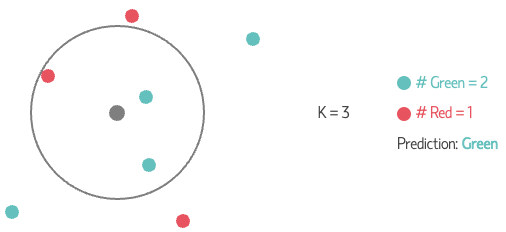

For example, if K=3 and among the 3 nearest neighbors 2 are class Green and 1 is class Red, the new point will be classified as class Green.



> **Question**: In KNN classification, the parameter K refers to:
>
> A. The number of nearest neighbors used to determine the class of a new data point.
>
> B. The number of features (dimensions) in the dataset.
>
> C. The number of classes in the classification problem.
>
> D. The exponent used in the distance calculation.

## Bias-Variance Trade-off in KNN

The choice of K has a significant effect on the model’s complexity and performance:

- Small K (e.g., K=1) tends to lead to complex, highly flexible decision boundaries that closely follow the training data. This can result in overfitting (low bias, high variance) – high accuracy on training data but low accuracy on unseen data.
- Large K (e.g., K large relative to number of samples) produces smoother, less complex decision boundaries because predictions are averaged over many neighbors. This can result in underfitting (high bias, low variance) – both training and validation accuracy might be low because the model is too simple to capture patterns.

We will observe this behavior when we experiment with different values of K.

## Distance Metrics and Feature Scaling

KNN relies on a distance measure to determine “nearest” neighbors. Common choices include:

-	Euclidean distance (L2 norm)
-	Manhattan distance (L1 norm)
-	Cosine distance, etc.

Feature scaling is crucial for KNN because the distance computation is sensitive to the scale of features. If one feature has a much larger range than others, it can dominate the distance calculation and distort nearest neighbor relationships. We typically address this by scaling or standardizing features (e.g., using z-scores) so that all features contribute more equally to distance calculations. You will see the impact of scaling when we apply KNN to a real dataset.

> **Question**: When using KNN on a dataset with features measured in very different units (e.g., one feature in the range 0-1000 and another in 0-1), what is the best practice?
>
> A. Normalize or standardize the features so they have similar scales before training KNN.
>
> B. Remove the feature with the larger range to avoid dominance in distance calculation.
>
> C. Use a different distance metric that ignores scale differences, so scaling is not needed.
>
> D. Increase K proportionally to the range differences to offset the scale issue.

## Implementing a Custom KNN Classifier

Instead of using sklearn.neighbors.KNeighborsClassifier, we will build our own MyKNNClassifier from scratch. This will solidify our understanding of how the algorithm works internally. We will incorporate some best practices into our implementation, such as input validation (shape checks, value checks) and ensuring reproducibility where relevant.

Let’s start by implementing the MyKNNClassifier class with the following specifications:
- It should follow the basic structure of scikit-learn classifiers, with fit and predict methods.
-	In fit(X, y), simply store the training data (X and y). We will use underscores (X_train_, y_train_) to indicate stored fitted data attributes.
-	In predict(X), use the KNN algorithm: for each sample in X, compute distances to all points in X_train_, find the K nearest neighbors, and return the majority class among those neighbors.
-	Include shape guards and input validation:
  -	Check that X and y have appropriate shapes in fit (e.g., same number of samples).
  -	Ensure that k is a positive integer and not greater than the number of training samples.
  -	Optionally, ensure that the number of features in any data passed to predict matches the number in X_train_.
-	We will use Euclidean distance by default (you can allow other metrics as an extension). To compute distances efficiently, we can use sklearn.metrics.pairwise_distances or NumPy operations.
-	Use the Python collections.Counter to perform the majority vote among neighbors’ labels.

Below is a scaffold of the MyKNNClassifier class. Fill in the TODO sections to complete the implementation:

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import pairwise_distances

class MyKNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, metric='euclidean'):
        """KNN classifier: majority vote among k nearest neighbours."""
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        """'Fit' (lazy): store training arrays to use during predict()."""
        X = np.asarray(X)
        y = np.asarray(y)
        # TODO: store training data (use attribute names referenced in predict)
        self.X_train_ = _________
        self.y_train_ = _________
        return self

    def predict(self, X):
        """Return one predicted label per row in X (same order as X)."""
        X = np.asarray(X)

        # TODO: prepare output array with same dtype as training labels
        y_pred = _________   # e.g., np.empty(X.shape[0], dtype=self.y_train_.dtype)

        for i, x in enumerate(X):
            # TODO: compute distances from x to all training points
            d = _________     # use pairwise_distances(self.X_train_, x[None, :], metric=self.metric).ravel()

            # TODO: get indices of the k smallest distances (nearest neighbours)
            J = _________     # e.g., np.argsort(d)[:self.k]

            # TODO: majority vote (deterministic tie-break via np.unique)
            labels, counts = _________   # e.g., np.unique(self.y_train_[J], return_counts=True)
            y_pred[i] = _________        # e.g., labels[np.argmax(counts)]

        # TODO: return predictions as a 1D NumPy array
        return _________

Once you have filled in the implementation, let’s test our custom classifier on a simple dataset to ensure it works as expected.

## A Dataset for Visualization

To visualize how KNN works, we’ll use R ElemStatLearn's "Simulated Mixture Gaussian" dataset:
-	Total points: 200 (100 per class).
-	Classes: 2
-	Features: $x_1$ and $x_2$ (2D), which we can plot on a plane.
-	This dataset is partially overlapping and not linearly separable, which is perfect for exploring KNN decision boundaries and performance.

Let’s load the dataset:

In [ ]:
import pandas as pd

# URL for our dataset, mixture-example.csv
URL = "https://drive.google.com/file/d/1l0QDFXeyrelvjXlyhnj4ppP_SSTABIKp/view?usp=sharing"
FILE_PATH = "https://drive.google.com/uc?export=download&id=" + URL.split("/")[-2]

data = pd.read_csv(FILE_PATH)

# Filter data by labels
X = data[['X', 'Y']].values
y = data['Label'].values

print("Dataset shape:", X.shape, "Labels shape:", y.shape)


Running the above code will load the dataset and print the shapes. You should see Dataset shape: (200, 2) Labels shape: (200,) confirming we have 200 samples with 2 features each. Next, let’s visualize this dataset to understand its structure:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[y==0, 0], X[y==0, 1], color='lightblue', label='0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='1', marker='o')

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.axis([-4, 4, -4, 4])
plt.legend()
plt.grid(True)
plt.show()

In the scatter plot, points of different colors represent the two classes (for example, blue for class 0 and red for class 1). Notice that the classes are composed of multiple clusters spread around the space, with some overlap between the blue and red points. This will make the classification task non-trivial, which is great for exploring how KNN behaves.

Splitting into Train, Validation, and Test Sets

To evaluate our model properly and tune the hyperparameter K, we will split the data into three sets:
	•	Training set (Train) – used to fit the KNN model.
	•	Validation set (Val) – used to select the best K (tuning the hyperparameter). We will test different K values on this set.
	•	Test set (Test) – used only for final evaluation of the model’s performance after tuning, to simulate unseen data.

We’ll do a 60%/20%/20% split for train/val/test. We will stratify the split to maintain the class proportions in each subset (ensuring each subset has roughly equal class 0 vs class 1 distribution). We also set a random_state for reproducibility:

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
# Next, split the Temp 40% into equal halves for Validation (20%) and Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train size:", X_train.shape[0], "Validation size:", X_val.shape[0], "Test size:", X_test.shape[0])

After this split, you should see roughly: Train size 120, Validation size 40, Test size 40 (since 60/20/20 of 200 is 120/40/40). It’s important that we do not touch the test set until the very end when we’re ready to evaluate our final model. Using the test set in tuning would be a form of data leakage and could make our evaluation overly optimistic.

> **Question**: Why do we use a separate validation set instead of tuning the hyperparameter K directly on the test set?
>
> A. To find the best model without overfitting to the test data, ensuring the test truly measures generalization.
>
> B. Because the test set must always be larger than the training set for better evaluation.
>
> C. We actually should use the test set for tuning to get the most accurate hyperparameter.
>
> D. KNN doesn’t require a validation set; it can tune itself automatically on the training data.

Now that we have our data split, let’s use our MyKNNClassifier to fit on the training set and evaluate on the validation set. This will serve as a quick check that our implementation works and give us a baseline accuracy for an arbitrary choice of K (say, K=3):

In [ ]:
# Instantiate our KNN classifier with K=3 (arbitrary choice to start)
knn = MyKNNClassifier(k=3, distance_metric='euclidean')
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = knn.predict(X_val)

# Calculate accuracy on validation set
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy with k=3: {val_accuracy:.2f}")

The printed accuracy is the proportion of validation points correctly classified with K=3. This gives a sense of how the model is doing with this choice. However, we shouldn’t read too much into a single result — we need to see how K affects performance overall.

## Tuning the Hyperparameter K

Let’s systematically evaluate how the choice of K affects the model. We will try a range of K values and compute the accuracy on both the training set and validation set for each K. Tracking training accuracy along with validation accuracy is informative:

- Training accuracy tells us how well the model fits the training data.
- Validation accuracy tells us how well the model generalizes to unseen data (for different K).

By comparing the two, we can diagnose overfitting or underfitting:

- If training accuracy is much higher than validation accuracy for a certain K, the model might be overfitting (performing well on train, poorly on val).
- If both training and validation accuracies are low, the model might be underfitting (not even fitting the train set well).

We’ll evaluate K from 1 up to, say, 15 and record the accuracies:

In [ ]:
train_accuracies = []
val_accuracies = []
ks = range(1, 16)

for k in ks:
    knn = MyKNNClassifier(k=k, distance_metric='euclidean')
    knn.fit(X_train, y_train)
    # Accuracy on training set
    y_pred_train = knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    # TO DO: Accuracy on validation set
    y_pred_val = knn.predict(_________)
    val_acc = accuracy_score(_________, _________)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Determine the best K based on highest validation accuracy
best_k = np.argmax(val_accuracies) + 1  # +1 because index 0 corresponds to k=1
best_val_acc = val_accuracies[best_k - 1]
print(f"Best K by validation accuracy = {best_k}, which gave val accuracy = {best_val_acc:.3f}")

Now, let’s plot the accuracy vs. K to visualize the trend:

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(ks, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(ks, val_accuracies, marker='s', label='Validation Accuracy')
plt.xticks(ks)
plt.xlabel('K (Number of Neighbours)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for KNN')
plt.legend()
plt.grid(True)
plt.show()

This plot shows two curves: one for training accuracy and one for validation accuracy as K increases. Observe the behavior:

- At K=1 (far left), training accuracy is likely 100% (each point is its own nearest neighbor, so it perfectly predicts training data) while validation accuracy might be significantly lower. This is a sign of overfitting (model too complex, essentially memorizing training data).
- As K increases, training accuracy usually drops (the model is less flexible), while validation accuracy may initially increase as overfitting reduces, then eventually decrease once K becomes too large (model underfits by being too rigid).
- There is often a sweet spot where validation accuracy is maximized — that is our chosen best K.

> **Question**: A KNN model with an extremely small K (like K=1) is likely to ____.
>
> A. Overfit – it will have high training accuracy but low validation accuracy due to very complex decision boundaries.
>
> B. Underfit – it will oversimplify the decision boundary, yielding low accuracy on training data.
>
> C. Generalize best – K=1 always yields the highest validation performance.
>
> D. Fail to classify any training point correctly.

You should see from the plot that our training accuracy starts high and decreases as K grows, whereas validation accuracy rises then eventually falls. The best K is where the validation curve peaks. We printed best_k above; let’s proceed with that value.

For example, if the plot shows that validation accuracy peaks at K=3 (just an example), then K=3 is our optimal choice on this validation set. We will use this best K for our final model.

## Visualizing Decision Boundaries

To build intuition, let’s visualize the decision boundary of our KNN classifier on this 2D dataset. We’ll use the DecisionBoundaryDisplay.from_estimator utility from scikit-learn to create a contour plot showing which class the KNN would predict at each point in the feature space. We will also plot the training and validation points to see how they fall in relation to the boundaries.

Note: This visualization is only possible in low dimensions (2D in our case). It can help us see how the choice of K affects the complexity of the boundary.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Use the best K found
knn_best = MyKNNClassifier(k=best_k, distance_metric='euclidean')
knn_best.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
# Plot the decision boundary for the trained classifier
DecisionBoundaryDisplay.from_estimator(
    knn_best,            # our classifier
    X_train,             # the data to use for creating the boundary (training data range)
    response_method="predict",
    cmap='coolwarm',     # color map for regions
    alpha=0.5            # transparency of the boundary overlay
)

# Overlay the validation data with class labels
class_names = ['0', '1']
colors = ['lightblue', 'orange']
for i, color in enumerate(colors):
    idx = np.where(y_val == i)
    ax.scatter(X_val[idx, 0], X_val[idx, 1], c=color, edgecolor='k', s=100, label=f'{class_names[i]}')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='best')  # Position the legend to not overlap with data
plt.axis([-4, 4, -4, 4])
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.grid()
plt.show()


In the visualization:

-	The colored regions (background) indicate the predicted class by KNN across the feature space (red vs blue regions).
-	Points are plotted on top: training points (small circles) and validation points (star markers) in their true class colors.
-	You can visually inspect how well the boundary separates the classes and where errors occur (validation stars that lie in a region of the opposite color would be misclassified).

Try experimenting by changing best_k to a smaller value (like 1) or a larger value and re-running the boundary plot code. You’ll see:

- For small K (e.g., 1-3): the decision boundary will be very wiggly and complex, wrapping tightly around individual training points. This can slice the space into many small regions (possibly leading to misclassifications on validation points that fall in strange pockets).
- For large K (e.g., 10+): the decision boundary will be much smoother, perhaps a simple shape dividing the two main clusters, but it might misclassify points that actually could be distinguished with a more nuanced boundary.

This aligns with our earlier discussion on overfitting vs underfitting:

- Small K => complex boundary (risk of overfitting).
- Large K => simple boundary (risk of underfitting).

## Evaluating on the Test Set

We used the validation set to choose the best K. Now it’s time to get an unbiased evaluation of our model using the test set (which we haven’t touched so far).

Before evaluating, it’s common practice (if data permits) to retrain the model on the combined training + validation data using the chosen hyperparameters. The idea is to utilize all available data (except test) for training now that we’ve fixed K, to potentially improve the model’s performance. In our case, we have a fairly small dataset, so this might help a bit.

Let’s combine the training and validation sets, retrain MyKNNClassifier with best_k on this larger set, and then evaluate on the test set:

In [ ]:
# Combine train+val for final training
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])

# TO DO: Train final model on combined data
final_knn = MyKNNClassifier(k=best_k, distance_metric='euclidean')
final_knn.fit(_________, _________)

# TO DO: Predict on the test set
y_pred_test = _________
test_accuracy = accuracy_score(_________, _________)
print(f"Test Accuracy with K={best_k}: {test_accuracy:.3f}")

Now we will create a confusion matrix for the test predictions. A confusion matrix shows how the model’s predictions compare to the true labels, broken down by class. It’s a great way to see which classes the model is getting wrong, not just how many it got wrong.

For our binary class problem (class 0 vs class 1):

- The confusion matrix will be 2x2.
- Rows typically represent the true class, and columns the predicted class.
- The cell (i, j) will contain the number of instances of true class i that were predicted as class j.

Let’s compute and visualize the confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f"Confusion Matrix (Test) - K={best_k}")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Examine the confusion matrix:

- The diagonal [top-left and bottom-right] are the counts of correct predictions for class 0 and class 1, respectively.
- The off-diagonals [top-right, bottom-left] are the misclassifications:
- Top-right: how many class 0 were wrongly predicted as class 1.
- Bottom-left: how many class 1 were wrongly predicted as class 0.

For example, a confusion matrix output:

$$
\begin{bmatrix}
18 & 2 \\
3  & 17
\end{bmatrix}
$$


would mean:
- 18 instances of class 0 correctly predicted as 0 (true negatives if class 1 is “positive”).
- 17 instances of class 1 correctly predicted as 1 (true positives).
- 2 instances of class 0 misclassified as 1 (false positives).
- 3 instances of class 1 misclassified as 0 (false negatives).

Using the confusion matrix along with accuracy gives us a more complete picture. We can identify if the model is skewed towards one class or if certain classes are harder to predict.

> **Question**: What does a confusion matrix provide that a single accuracy number does not?
>
> A. It shows the breakdown of correct and incorrect predictions for each class, highlighting which classes are confused with each other.
>
> B. It directly gives the precision and recall without further calculation.
>
> C. It shows how well the model performs on the training data versus test data.
>
> D. It is only useful for KNN models and not for other classifiers.

Interpreting Results:

- Check the test accuracy you obtained. Is it close to the validation accuracy at best K? Ideally, it should be in a similar ballpark if our validation selection was effective and there was no overfitting to the validation set.
- Look at the confusion matrix. Are the errors mostly in one of the off-diagonals? This might indicate if the model has a bias towards predicting one class more often (for instance, if one class has more examples).
- If we saw a large difference between training and validation accuracy earlier (a sign of overfitting), did using the best K and more training data improve the situation?

## Applying KNN to the Wine Dataset

Now that we’ve implemented and tested KNN on a synthetic dataset, let’s apply our MyKNNClassifier to a real-world dataset: the classic Wine recognition dataset. This dataset consists of chemical analysis results of wines derived from three different cultivars (classes). There are 13 numeric features (like alcohol content, malic acid, etc.) and 3 classes of wine.

We will see how KNN performs on this multi-class dataset and demonstrate the critical importance of feature scaling.

Loading and Exploring the Data

First, load the dataset and inspect its basic properties:

In [ ]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
print("Wine data shape:", X_wine.shape, "Labels:", set(y_wine))
print("Feature names:", wine.feature_names)
print("Class names:", wine.target_names)

This will output:

- Shape of the data (should be (178, 13) meaning 178 samples, 13 features).
- The set of labels (0, 1, 2 corresponding to the three wine classes).
- The feature names and class names (class names might be generic like class_0, class_1, etc., since this dataset doesn’t give actual cultivar names).

We will perform a train-test split on this dataset (for simplicity we’ll do just train and test here, though one could do train/val/test or cross-validation for tuning). Let’s use 70% of the data for training and 30% for testing, stratified by class:

In [ ]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)
print("Wine train size:", X_train_w.shape[0], "test size:", X_test_w.shape[0])

Now, important: The features in the wine dataset have very different scales (for example, “Alcohol” might be in the range 11-14, “Malic acid” in 0-5, “Proline” in 200-1700, etc.). We must scale the features before using KNN. We will compare model performance with and without scaling to emphasize this.

We’ll use standardization (z-scores) via StandardScaler to scale features to mean 0 and variance 1. We fit the scaler on the training data only (to avoid leaking information from the test set), then transform both train and test sets:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()
# Fit on training data and transform training data
X_train_w_scaled = scaler.fit_transform(X_train_w)
# Transform test data using the *fitted* scaler
X_test_w_scaled = scaler.transform(X_test_w)

Note: We only call fit_transform on the training data. The test data is transformed with the same scaling parameters. This ensures that our model is truly tested on unseen data that hasn’t influenced the scaling. Never fit the scaler (or any preprocessing) on the full dataset before splitting or on the test set – that would introduce data leakage and inflate performance.

> **Question**: Correct scaling order:
>
> A. fit scaler on train; transform train/val/test
>
> B. fit scaler on all data; transform all
>
> C. fit on test only
>
> D. fit on val only

Now let’s evaluate KNN on the wine dataset in two scenarios:

1.	Without scaling – using the original features.
2.	With scaling – using the standardized features.

For simplicity, we’ll use the same K for both scenarios (for instance, K = 3, which is a common choice and often near optimal as well). If you want, you could perform a quick tune on the training set or via cross-validation to find the best K for wine, but here our focus is on the effect of scaling.

### 1. KNN on Wine data (unscaled features)

In [ ]:
# TO DO: Train final model on unscaled features
knn_wine = MyKNNClassifier(k=3, distance_metric='euclidean')
knn_wine.fit(_________, _________)
# TO DO: Predict on the test set
y_pred_wine = _________
acc_wine = accuracy_score(y_test_w, _________)
print(f"KNN accuracy on Wine test (unscaled features, k=3): {acc_wine:.3f}")

cm_wine = confusion_matrix(_________, _________)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_wine, annot=True, fmt='d', cmap="YlOrBr",
            xticklabels=[f"Pred {c}" for c in range(3)],
            yticklabels=[f"Actual {c}" for c in range(3)])
plt.title("Wine Data Confusion Matrix (Unscaled)")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

This will output the accuracy and show the confusion matrix for the 3-class classification. You will likely observe a moderate accuracy (often around 0.65-0.75 range for KNN unscaled on wine) and the confusion matrix may show a lot of misclassifications (off-diagonal counts).

### 2. KNN on Wine data (scaled features)

In [ ]:
# TO DO: Train final model on unscaled features
knn_wine_scaled = MyKNNClassifier(k=3, distance_metric='euclidean')
knn_wine_scaled.fit(_________, _________)
# TO DO: Predict on the test set
y_pred_wine_scaled = _________
acc_wine_scaled = _________
print(f"KNN accuracy on Wine test (scaled features, k=3): {acc_wine_scaled:.3f}")

cm_wine_scaled = confusion_matrix(_________, _________)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_wine_scaled, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=[f"Pred {c}" for c in range(3)],
            yticklabels=[f"Actual {c}" for c in range(3)])
plt.title("Wine Data Confusion Matrix (Scaled)")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

Now check the printed accuracies and the confusion matrices side by side:

- You should see that accuracy with scaled features is significantly higher than without scaling. It’s not uncommon to see unscaled KNN around ~70% accuracy vs scaled KNN around ~95% accuracy on this wine dataset.
- The unscaled confusion matrix likely showed many off-diagonal values (mix-ups among classes), whereas the scaled confusion matrix should have clearer dominance on the diagonal (more correct classifications per class).

This dramatic difference occurs because, without scaling, some features (like “Proline” which can have values in the hundreds) dominate the distance calculation, drowning out the influence of other features. After scaling, each feature contributes more equally, and KNN can make much better distinctions between the classes.

> **Question**: Why did the KNN classifier perform so much better after scaling the features?
>
> A. Because scaling ensures that no single feature disproportionately influences the distance calculation, allowing the classifier to consider all features fairly.
>
> B. Because KNN cannot work at all without scaling the data first.
>
> C. Because scaling reduces overfitting by shrinking the data range.
>
> D. Because the test data was easier to classify after scaling (scaling magically separates classes on its own).

## Visualizing Wine Data with t-SNE

To further illustrate the effect of scaling on the data itself, we can use t-SNE (t-distributed Stochastic Neighbor Embedding) to visualize the wine data in two dimensions. t-SNE is a nonlinear dimensionality reduction technique that tries to preserve the local structure of the data (i.e., points that are close in original space stay close in the embedding). It’s useful for visualizing high-dimensional data.

We’ll create two t-SNE plots: one on the original features, one on the scaled features, and compare them.

In [ ]:
from sklearn.manifold import TSNE

# t-SNE on original wine data
tsne = TSNE(n_components=2, random_state=42)
X_wine_tsne_orig = tsne.fit_transform(X_wine)  # using all data for visualization

# t-SNE on scaled wine data
tsne2 = TSNE(n_components=2, random_state=42)
X_wine_tsne_scaled = tsne2.fit_transform(StandardScaler().fit_transform(X_wine))

Now let’s plot these side by side. We’ll color points by their true class label (0, 1, 2) to see if classes form distinct clusters. We want to use the same color scheme for both plots for a fair comparison:

In [ ]:
# Define a color mapping for the three classes
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=y_wine.min(), vmax=y_wine.max())
target_names = wine.target_names  # e.g., ['class_0', 'class_1', 'class_2']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot t-SNE for original data
scatter0 = axes[0].scatter(X_wine_tsne_orig[:, 0], X_wine_tsne_orig[:, 1],
                           c=y_wine, cmap=cmap, norm=norm, edgecolor='k', alpha=0.7)
axes[0].set_title("t-SNE (Original Features)")
axes[0].set_xlabel("TSNE 1")
axes[0].set_ylabel("TSNE 2")
# Plot t-SNE for scaled data
scatter1 = axes[1].scatter(X_wine_tsne_scaled[:, 0], X_wine_tsne_scaled[:, 1],
                           c=y_wine, cmap=cmap, norm=norm, edgecolor='k', alpha=0.7)
axes[1].set_title("t-SNE (Scaled Features)")
axes[1].set_xlabel("TSNE 1")
axes[1].set_ylabel("TSNE 2")

# Add a legend using class names for colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='none', label=name,
                          markerfacecolor=cmap(norm(i)), markersize=8, edgecolor='k')
                   for i, name in enumerate(target_names)]
axes[1].legend(handles=legend_elements, title="Wine Class", loc='best')

plt.tight_layout()
plt.show()

Interpret the t-SNE plots:

- Original features t-SNE: You might see that the points are in a weird, perhaps elongated shape or not clearly separated by class. The classes could be mixed together because certain features dominated distances, causing t-SNE to bunch points oddly.
- Scaled features t-SNE: Here, you should observe more distinct clustering of points by class. The three classes are likely more separable (perhaps forming three clusters or at least tighter groupings of same-colored points). This indicates that after scaling, the inherent structure of the data (different wine classes) is clearer in the feature space, which is why KNN could perform better.

These plots visually reinforce the importance of scaling: with scaled data, points of the same class are nearer to each other and separate from other classes, making classification easier for a distance-based method like KNN. Without scaling, that structure was obscured.

## Summary and Best Practices

In this lab, we:

- Implemented KNN from scratch as MyKNNClassifier and verified it works similarly to scikit-learn’s KNN.
- Used training, validation, test splits to tune the hyperparameter K without leaking test information. We observed how to pick the best K by validation accuracy.
- Explored the bias-variance trade-off in KNN: small K vs large K and how they affect decision boundaries and accuracy.
- Emphasized evaluation using accuracy and confusion matrices. Accuracy gives an overall performance, while confusion matrices provide insight into class-wise performance and misclassification patterns.
- Highlighted feature scaling as a critical preprocessing step for KNN. The Wine dataset example showed that scaling features (using StandardScaler) dramatically improved KNN accuracy, and t-SNE visualizations helped explain why.
- Incorporated various best practices:
- Shape and input validation in our implementation (to catch mistakes early).
- Warnings about data leakage (e.g., fitting scalers on full data or using test data in tuning).
- Setting random_state for reproducibility of our data splits and t-SNE.
- Creating scalable visualizations (like adjusting marker sizes and using transparency for large scatter plots, and programmatically generating legends) to handle different dataset sizes and clarity.

KNN is a simple yet powerful algorithm for many scenarios. However, keep in mind:
- It can be computationally expensive for large datasets (since distance to all training points must be computed for each prediction).
- It doesn’t produce an explicit model, so storage of training data and prediction speed can be issues.
- It often serves as a good baseline but may be outperformed by more complex models with proper training. Still, the lessons about cross-validation, scaling, and evaluation we practiced here apply to many other machine learning algorithms.


> **Wrap-Up Question**: Bias–variance in KNN:
>
> A. small K → low bias / high variance ; large K → high bias / low variance
>
> B. small K → high bias / low variance ; large K → low bias / high variance
>
> C. both small & large K → high variance
>
>D. K doesn’t affect either

> Great job completing the lab! Feel free to experiment further:
>
> - Try other distance metrics (Manhattan, cosine) by setting distance_metric in MyKNNClassifier and see how the decision boundaries or accuracy change.
> - Use cross-validation to confirm the best K.
> - Explore how KNN deals with higher-dimensional data or imbalanced classes, etc.